# Hierarchical Clustering

Hierarchical clustering means creating a tree of clusters by iteratively grouping or separating data points. There are two types of hierarchical clustering:
* Agglomerative clustering
* Divisive clustering

**One of the advantages of hierarchical clustering is that we do not have to specify the number of clusters (but we can).**

![](images/1.jpg)

## Agglomerative clustering

Agglomerative clustering is kind of a bottom-up approach. Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined.

We have a dataset consists of 9 samples. I choose numbers associated with these samples to demonstrate the concept of similarity. At each iteration (or level), the closest numbers (i.e. samples) are combined together. As you can see in the figure below, we start with 9 clusters. The closest ones are combined at the first level and then we have 7 clusters. The number of black lines that intersect with blue lines represents the number of clusters.

![](images/2.jpg)

The figure above is called dendrogram which is a diagram representing tree-based approach. In hierarchical clustering, dendrograms are used to visualize the relationship among clusters.
As we go up, the number of clusters decreases as more samples are combined. After level 6, all samples are combined under one big cluster.

![](images/3.jpg)

This is a very simple data set to illustrate the purpose but real life data sets are obviously more complex. We mention that “closest data points (or clusters)” are combined together. But how do the algorithms identify closest ones? There are 4 different methods implemented in scikit-learn to measure the similarity:
* Ward’s linkage: Minimizes the variance of the clusters being merged. Least increase in total variance around cluster centroids is aimed.
* Average linkage: Average distance of each data point in two clusters.
* Complete (maximum) linkage: Maximum distance among all data points in two clusters.
* Single (minimum) linkage: Minimum distance among all data points in two clusters.

*The default selection is ward’s linkage which works well on most datasets.

![](images/4.jpg)

One of the advantages of hierarchical clustering is that we do not have to specify the number of clusters beforehand. However, it is not wise to combine all data points into one cluster. We should stop combining clusters at some point. Scikit-learn provides two options for this:
* Stop after a number of clusters is reached (n_clusters)
* Set a threshold value for linkage (distance_threshold). If the distance between two clusters are above the threshold, these clusters will not be merged.

## Divisive Clustering

Divisive clustering is not commonly used in real life so I will mention it briefly. Simple yet clear explanation is that divisive clustering is the opposite of agglomerative clustering. We start with one giant cluster including all data points. Then data points are separated into different clusters. It is an up to bottom approach.

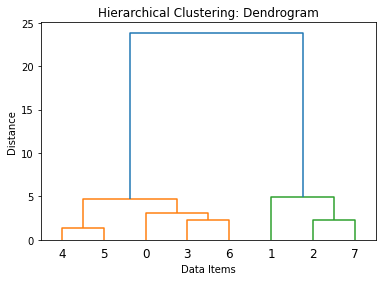

In [1]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import dendrogram
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
 
# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})

# create dendrogram using ward linkage
dendrogram_plot = dendrogram(linkage(data, method = 'ward'))

# Set title of the plot
plt.title('Hierarchical Clustering: Dendrogram')

# Set x-axis label
plt.xlabel('Data Items')

# Set y-axis label
plt.ylabel('Distance')

# Display the plot
plt.show()

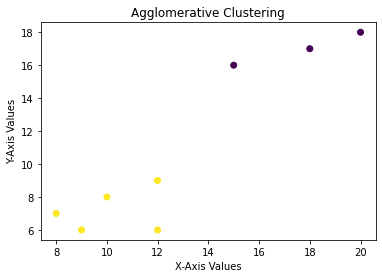

In [2]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
 
# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})
 
# Specify number of clusters
num_clusters = 2
 
# Create agglomerative clustering model
ac = AgglomerativeClustering(n_clusters = num_clusters, linkage='ward')
 
# Fit the Agglomerative Clustering model
ac.fit(data)
 
# Predict the target variable
pred=ac.labels_
 
# Plot the Clusters
plt.scatter(data.X,data.Y, c=pred, marker="o")

# Set title of the plot 
plt.title('Agglomerative Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()


# Density-based clustering

Partition-based and hierarchical clustering techniques are highly efficient with normal shaped clusters. However, when it comes to arbitrary shaped clusters or detecting outliers, density-based techniques are more efficient.
For example, the dataset in the figure below can easily be divided into three clusters using k-means algoritm.

![](images/5.jpg)

Consider the following figures:
![](images/6.jpg)

The data points in these figures are grouped in arbitrary shapes or include outliers. Density-based clustering algorithms are very effienct at finding high-density regions and outliers. It is very important to detect outliers for some task, e.g. anomaly detection.

# DBSCAN algorithm

DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers). The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.

There are two key parameters of DBSCAN:
* eps: The distance that specifies the neighborhoods. Two points are considered to be neighbors if the distance between them are less than or equal to eps.
* minPts: Minimum number of data points to define a cluster.

Based on these two parameters, points are classified as core point, border point, or outlier:
* Core point: A point is a core point if there are at least minPts number of points (including the point itself) in its surrounding area with radius eps.
* Border point: A point is a border point if it is reachable from a core point and there are less than minPts number of points within its surrounding area.
* Outlier: A point is an outlier if it is not a core point and not reachable from any core points.

![](images/7.jpg)

In this case, minPts is 4. Red points are core points because there are at least 4 points within their surrounding area with radius eps. This area is shown with the circles in the figure. The yellow points are border points because they are reachable from a core point and have less than 4 points within their neighborhood. Reachable means being in the surrounding area of a core point. The points B and C have two points (including the point itself) within their neigborhood (i.e. the surrounding area with a radius of eps). Finally N is an outlier because it is not a core point and cannot be reached from a core point.

To see how the algorithm works, visit: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

[[ 0.94182515  0.33610324]
 [-0.95383508  0.30033088]
 [ 0.83892739  0.54424336]
 ...
 [ 1.19528309 -0.48074692]
 [-0.22602337  0.97412188]
 [ 0.55867137  0.82938911]]


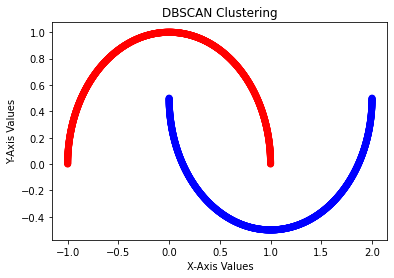

In [3]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import DBSCAN clustering model
from sklearn.cluster import DBSCAN

# import make_moons dataset
from sklearn.datasets import make_moons
 
# Generate some random moon data
features, label = make_moons(n_samples = 2000)
print(features)
 
# Create DBSCAN clustering model
db = DBSCAN()
 
# Fit the Spectral Clustering model
db.fit(features)
 
# Predict the target variable
pred_label=db.labels_
 
# Plot the Clusters
plt.scatter(features[:, 0], features[:, 1], c=pred_label, marker="o",cmap="bwr_r")
# Set title of the plot
plt.title('DBSCAN Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()

## Cluster Performance Evaluation

In [4]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
    
# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label
 
# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [6]:
# Import K-means Clustering
from sklearn.cluster import KMeans

# Import metrics module for performance evaluation
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import fowlkes_mallows_score
 
# Specify the number of clusters
num_clusters = 2
 
# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(feature_train)
 
# Predict the target variable
predictions=km.predict(feature_test)
 
# Calculate internal performance evaluation measures
print("Davies-Bouldin Index:", davies_bouldin_score(feature_test, predictions))
print("Silhouette Coefficient:", silhouette_score(feature_test, predictions))

# Calculate External performance evaluation measures
print("Adjusted Rand Score:", adjusted_rand_score(target_test, predictions))
print("Jaccard Score:", jaccard_score(target_test, predictions))
print("F-Measure(F1-Score):", f1_score(target_test, predictions))
print("Fowlkes Mallows Score:", fowlkes_mallows_score(target_test, predictions))

Davies-Bouldin Index: 0.7916877512521089
Silhouette Coefficient: 0.5365443098840619
Adjusted Rand Score: 0.03789319261940486
Jaccard Score: 0.29411764705882354
F-Measure(F1-Score): 0.4545454545454546
Fowlkes Mallows Score: 0.6041244457314743


**Exercises**: Tune the code above and evaluate other clustering algorithms we learned. 